<a href="https://colab.research.google.com/github/maxrgnt/pythdc2-project2/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Panel Data
import pandas as pd
# System folders
import os
from pathlib import Path
# Visualization
import plotly.graph_objs as go
import seaborn as sns
%matplotlib inline

In [3]:
# read in the data
url='https://raw.githubusercontent.com/maxrgnt/pythdc2-project2/master/data/borderCrossing.csv'
df = pd.read_csv(url)
df.sample(3)

,Unnamed: 0,Port Name,State,Port Code,Border,Date,Measure,Value,Location
69162,208196,Nogales,Arizona,2604,US-Mexico Border,3/1/2005 0:00,Bus Passengers,17399,POINT (-110.94 31.33)
90096,270956,Nogales,Arizona,2604,US-Mexico Border,2/1/2001 0:00,Pedestrians,372415,POINT (-110.94 31.33)
86970,261646,Nighthawk,Washington,3011,US-Canada Border,9/1/2001 0:00,Train Passengers,0,POINT (-119.67000000000002 49)


In [0]:
#df['Measure'].value_counts()

In [0]:
# Only interested in Passenger / Pedestrian crossings
people = df['Measure'].str.contains('Passengers|Pedestrians', case = False)

In [6]:
# Check to see how much data frame shrinks after filtering down
print(f'All measures: {df.shape}')
#df = df[people] # This gave index error when re-running, changed to df.loc
df = df.loc[people]
print(f'Just people: {df.shape}')

All measures: (115336, 9)
Just people: (115336, 9)


In [7]:
df.sample(3)

,Unnamed: 0,Port Name,State,Port Code,Border,Date,Measure,Value,Location
81757,246017,Oroville,Washington,3019,US-Canada Border,10/1/2002 0:00,Personal Vehicle Passengers,41487,POINT (-119.46 49)
30265,91536,Hidalgo,Texas,2305,US-Mexico Border,6/1/2012 0:00,Personal Vehicle Passengers,754093,POINT (-98.27 26.1)
109588,329478,Westhope,North Dakota,3419,US-Canada Border,2/1/1997 0:00,Pedestrians,0,POINT (-101.02 49)


In [0]:
# Drop unnecessary columns 
df.drop(['Port Code','Port Name'],axis=1,inplace=True)

In [9]:
df.sample(3)

,Unnamed: 0,State,Border,Date,Measure,Value,Location
69900,210409,North Dakota,US-Canada Border,1/1/2005 0:00,Train Passengers,0,POINT (-102.27 49)
8146,25193,Idaho,US-Canada Border,8/1/2016 0:00,Train Passengers,222,POINT (-116.17999999999999 49)
45478,137132,Michigan,US-Canada Border,8/1/2009 0:00,Train Passengers,559,POINT (-82.42 43)


In [10]:
# are there any null values?
df.isnull().sum()

Unnamed: 0    0
State         0
Border        0
Date          0
Measure       0
Value         0
Location      0
dtype: int64

In [0]:
# Need state abbreviations not full names
df['StateAbrv'] = df['State'].map({'Alaska':'AL',
                                   'Arizona':'AZ',
                                   'California':'CA',
                                   'Idaho':'ID',
                                   'Maine':'ME',
                                   'Michigan':'MI',
                                   'Minnesota':'MN',
                                   'Montana':'MT',
                                   'New Mexico':'NM',
                                   'New York':'NY',
                                   'North Dakota':'ND',
                                   'Ohio':'OH',
                                   'Texas':'TX',
                                   'Vermont':'VT',
                                   'Washington':'WA'})

In [0]:
# Break out Location into latitude and longitude
                # substring from 'POINT( ' to ')' and split on ' ' grabbing first then second element set as float
df['Latitude'] = df['Location'].str[len('POINT ('):-1].str.split(' ').str[1].astype(float)
df['Longitude'] = df['Location'].str[len('POINT ('):-1].str.split(' ').str[0].astype(float)

In [0]:
# Handle the Date column
df['newDate'] = pd.to_datetime(df['Date'])

In [33]:
# Inspect the date column
df['Year'] = df['newDate'].dt.year
df['Month'] = df['newDate'].dt.month
# How many years of data available?
maxYear = df['newDate'].dt.year.max()
minYear = df['newDate'].dt.year.min()
print(f'From {minYear} to {maxYear} for total of {maxYear-minYear} year(s) of data.')

From 1996 to 2019 for total of 23 year(s) of data.


In [34]:
# df.groupby(['Border','Year'])[['Value']].sum().head()
# df = df.sample(10000)
df2 = df.groupby('StateAbrv')[['Value']].sum().reset_index()
df2.head()

,StateAbrv,Value
0,AL,10687909
1,AZ,664433912
2,CA,1770174503
3,ID,11048350
4,ME,138145359


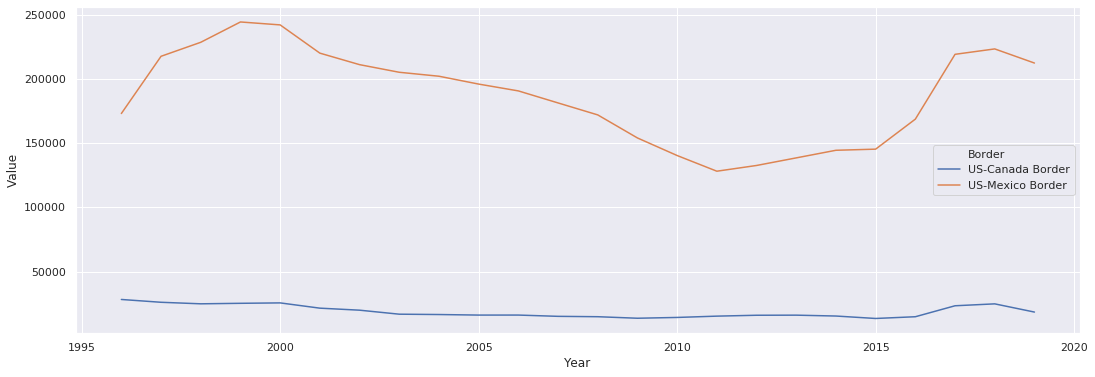

In [35]:
sns.set(rc={'figure.figsize':(18,6)})
sns.lineplot(x = 'Year', y = 'Value', hue = 'Border', ci=None, data = df);

In [0]:
# mapbox_access_token = open("assets/mytoken.mapbox_token").read()

# fig = go.Figure(go.Scattermapbox(
#     lat=df['Latitude'],
#     lon=df['Longitude'],
#     mode='markers',
#     marker=go.scattermapbox.Marker(
#         size=20,
#         colorscale='Purples',
#         color=df['Value']
#     ),
#     text=df['Value']

# ))
# fig.update_layout(
#     autosize=True,
#     hovermode='closest',
#     mapbox=go.layout.Mapbox(
#         accesstoken=mapbox_access_token,
#         bearing=0,
#         center=go.layout.mapbox.Center(
#             lat=39.8283,
#             lon=-98.5795
#         ),
#         pitch=0,
#         zoom=3
#     ),
# )
# fig

In [37]:
fig = go.Figure(data=go.Choropleth(
    locations=df2['StateAbrv'], # Spatial coordinates
    z = df2['Value'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Purples',
    colorbar_title = "Pedestrians",
))

fig.update_layout(
    title_text = 'Migration',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [38]:
url='https://raw.githubusercontent.com/maxrgnt/pythdc2-project2/master/data/pctChangeGDP.csv# read in the data'
gdp = pd.read_csv(url)
gdp.sample(3)

,GeoFips,GeoName,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
58,97000,Rocky Mountain,4.2,6.7,7.4,3.4,9.0,9.8,9.3,11.8,14.7,17.4,12.4,12.6,12.7,12.3,16.5,14.1,13.6,14.4,4.7,5.2,9.2,5.1,0.0,4.0,6.6,5.8,7.1,5.4,8.0,9.1,8.8,7.7,7.5,7.6,8.2,7.8,9.0,3.6,2.6,4.0,6.0,9.2,8.1,7.4,4.0,-3.7,3.3,4.3,2.9,4.7,5.2,3.8,3.2,5.1,6.2
30,33000,New Hampshire,9.8,8.2,10.6,9.3,9.5,8.5,8.3,9.2,8.8,15.1,7.1,8.3,13.8,14.3,17.3,13.0,10.9,13.1,8.8,10.7,16.9,12.3,10.8,14.3,9.3,3.7,0.0,4.2,6.3,3.9,6.7,9.2,8.4,6.9,6.1,3.3,8.0,3.1,4.4,5.5,5.3,4.1,5.4,2.2,0.3,1.7,3.6,2.0,3.5,3.7,3.1,4.8,3.3,3.5,4.4
47,51000,Virginia,8.8,7.5,9.1,6.9,11.1,11.0,7.2,10.0,12.6,13.0,10.1,8.1,12.9,9.2,11.9,10.4,9.9,12.8,8.0,11.2,13.0,9.1,9.6,9.6,8.9,7.5,5.3,4.2,5.2,5.5,5.6,5.2,6.2,6.4,7.3,7.2,6.8,6.4,3.3,5.7,7.2,8.4,5.2,3.6,1.6,2.5,3.4,2.2,2.9,2.3,1.9,4.5,1.9,3.4,4.7


In [0]:
# Need state abbreviations not full names
gdp['StateAbrv'] = gdp['GeoName'].map({'Alaska':'AL',
                                   'Arizona':'AZ',
                                   'California':'CA',
                                   'Idaho':'ID',
                                   'Maine':'ME',
                                   'Michigan':'MI',
                                   'Minnesota':'MN',
                                   'Montana':'MT',
                                   'New Mexico':'NM',
                                   'New York':'NY',
                                   'North Dakota':'ND',
                                   'Ohio':'OH',
                                   'Texas':'TX',
                                   'Vermont':'VT',
                                   'Washington':'WA'})

In [40]:
print(gdp.shape)
gdp.dropna(axis=0,inplace=True)
print(gdp.shape)
# unpivot years into their own column
gdp = pd.melt(gdp, id_vars=['StateAbrv'], var_name='Year', value_name = 'Value')

(60, 58)
(15, 58)


In [46]:
gdp.shape

(855, 3)

In [44]:
df[['StateAbrv','Year','Value']].shape

(115336, 3)